In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# --- Ordinal Features ---
education_levels = ["High School", "Associate's", "Bachelor's", "Master's", "PhD"]
# Assign probabilities to make it somewhat realistic (more bachelors, fewer PhDs)
education_probs = [0.25, 0.20, 0.35, 0.15, 0.05]
education_data = np.random.choice(education_levels, num_rows, p=education_probs)

satisfaction_scores = ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"]
satisfaction_probs = [0.1, 0.15, 0.3, 0.3, 0.15] # Skewed towards neutral/satisfied
satisfaction_data = np.random.choice(satisfaction_scores, num_rows, p=satisfaction_probs)

# --- Nominal Features ---
cities = ["New York", "London", "Paris", "Tokyo", "Sydney", "Berlin"]
city_data = np.random.choice(cities, num_rows)

product_types = ["Electronics", "Clothing", "Books", "Home Goods", "Sports"]
product_type_data = np.random.choice(product_types, num_rows)

# --- Numeric Features (for scaling) ---
age_data = np.random.randint(18, 71, size=num_rows) # Ages between 18 and 70

# Income - let's make it somewhat correlated with education for more realism (optional, simple random here)
income_data = np.random.randint(25000, 150001, size=num_rows)
# Add a bit more for higher education (very simplified correlation)
for i in range(num_rows):
    if education_data[i] == "Master's":
        income_data[i] = np.random.randint(70000, 200001)
    elif education_data[i] == "PhD":
        income_data[i] = np.random.randint(90000, 250001)

months_subscribed_data = np.random.randint(1, 61, size=num_rows) # Subscribed between 1 and 60 months

# --- Create DataFrame ---
data = {
    'ID': range(1, num_rows + 1),
    'Education_Level': education_data,
    'Satisfaction_Score': satisfaction_data,
    'City': city_data,
    'Preferred_Product_Type': product_type_data,
    'Age': age_data,
    'Income': income_data,
    'Months_Subscribed': months_subscribed_data
}

df = pd.DataFrame(data)
df

,ID,Education_Level,Satisfaction_Score,City,Preferred_Product_Type,Age,Income,Months_Subscribed
0,1,Associate's,Very Unsatisfied,Tokyo,Sports,22,60270,32
1,2,PhD,Satisfied,Paris,Clothing,62,132918,45
2,3,Bachelor's,Neutral,New York,Clothing,21,107637,47
3,4,Bachelor's,Neutral,Tokyo,Books,33,76934,21
4,5,High School,Very Satisfied,Berlin,Clothing,41,89895,16
...,...,...,...,...,...,...,...,...
95,96,Bachelor's,Neutral,London,Clothing,29,80771,25
96,97,Bachelor's,Satisfied,New York,Clothing,58,82799,22
97,98,Associate's,Very Satisfied,New York,Books,36,38116,59
98,99,High School,Very Satisfied,New York,Clothing,29,50470,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      100 non-null    int64 
 1   Education_Level         100 non-null    object
 2   Satisfaction_Score      100 non-null    object
 3   City                    100 non-null    object
 4   Preferred_Product_Type  100 non-null    object
 5   Age                     100 non-null    int32 
 6   Income                  100 non-null    int32 
 7   Months_Subscribed       100 non-null    int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 5.2+ KB


In [6]:
df.describe()

,ID,Age,Income,Months_Subscribed
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,45.050000,92119.090000,31.520000
std,29.011492,14.569496,43442.462644,17.509293
min,1.000000,18.000000,26062.000000,1.000000
25%,25.750000,33.000000,51829.500000,16.750000
50%,50.500000,45.500000,92831.500000,29.500000
75%,75.250000,56.250000,122208.250000,48.250000
max,100.000000,70.000000,204821.000000,60.000000


In [8]:
df['Satisfaction_Score'].value_counts()

Satisfaction_Score
Neutral             30
Satisfied           25
Very Satisfied      18
Unsatisfied         18
Very Unsatisfied     9
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Months_Subscribed'>

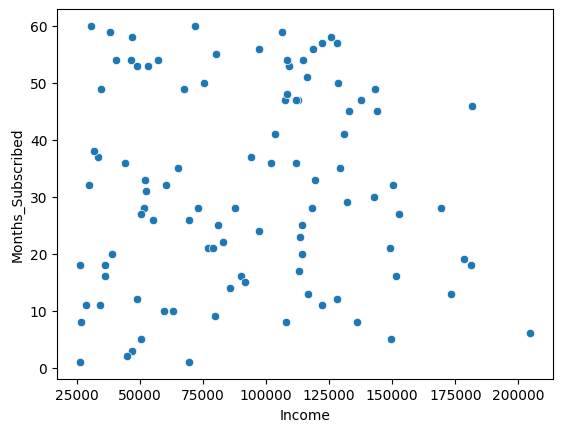

In [11]:
sns.scatterplot(data=df, x='Income', y='Months_Subscribed')

# Feature Engineering

In [28]:
df['Satisfaction_Score'].value_counts()

Satisfaction_Score
Neutral             30
Satisfied           25
Very Satisfied      18
Unsatisfied         18
Very Unsatisfied     9
Name: count, dtype: int64

In [34]:
# train test split
from sklearn.model_selection import train_test_split
x = df.drop(columns='Months_Subscribed')
y = df['Months_Subscribed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
x_train.shape

(80, 7)

In [46]:
# transforming columns
from sklearn.compose import ColumnTransformer
tf = ColumnTransformer(transformers=[
    ('tnf1', StandardScaler(), ['Age','Income']),
    ('tnf2', OrdinalEncoder(categories=[['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'], ["High School", "Bachelor's", "Associate's", "Master's", "PhD"]]), ['Satisfaction_Score', 'Education_Level']),
    ('tnf3', OneHotEncoder(drop='first', sparse_output=False), ['City', 'Preferred_Product_Type'])
], remainder='passthrough')

In [47]:
x_transformed = tf.fit_transform(x_train)

In [50]:
x_transformed

array([[ 1.42651252,  1.50660319,  3.        , ...,  0.        ,
         0.        , 94.        ],
       [ 0.87084118, -0.43994866,  0.        , ...,  0.        ,
         0.        , 49.        ],
       [-1.07400851,  0.99353155,  1.        , ...,  0.        ,
         0.        , 80.        ],
       ...,
       [-0.65725501, -1.28723771,  4.        , ...,  0.        ,
         0.        , 98.        ],
       [ 0.176252  , -0.65746724,  1.        , ...,  0.        ,
         1.        , 33.        ],
       [ 0.59300551, -0.74628942,  3.        , ...,  0.        ,
         1.        , 77.        ]], shape=(80, 14))

In [53]:
df['Preferred_Product_Type'].value_counts()

Preferred_Product_Type
Clothing       27
Sports         24
Home Goods     23
Electronics    16
Books          10
Name: count, dtype: int64